<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# Тема 7. Обучение без учителя: PCA и кластеризация
## <center>Бонус. Метод главных компонент. Игрушечный пример

In [1]:
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

**Пусть дана выборка X.**

In [2]:
X = np.array([[1.0, 3.0], [3.0, 5.0], [5.0, 1.0], [7.0, 4.0], [4.0, 7.0]])

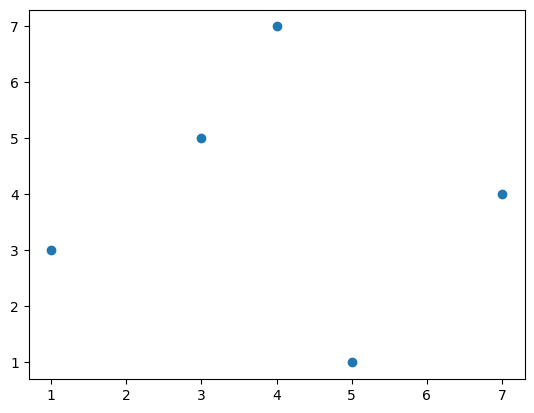

In [3]:
plt.scatter(X[:, 0], X[:, 1]);

**Как выбрать направление, в проекции на которое дисперсия координат точек максимальна? Синия прямая или зеленая? А может, красная?**

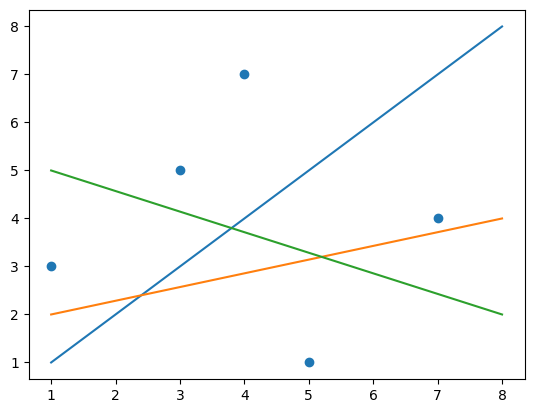

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.plot(np.linspace(1, 8, 10), np.linspace(1, 8, 10))
plt.plot(np.linspace(1, 8, 10), np.linspace(2, 4, 10))
plt.plot(np.linspace(1, 8, 10), np.linspace(5, 2, 10));

**Стандартизуем матрицу X. Вычитаем средние по столбцам (4 и 4) и делим на стандартные отклонения по столбцам (2 и 2). Кстати, пришлось писать код, чтоб подобрать координаты так, чтоб все средние и отклонения были целыми :)**

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
X_scaled = StandardScaler().fit_transform(X)

In [7]:
X_scaled

array([[-1.5, -0.5],
       [-0.5,  0.5],
       [ 0.5, -1.5],
       [ 1.5,  0. ],
       [ 0. ,  1.5]])

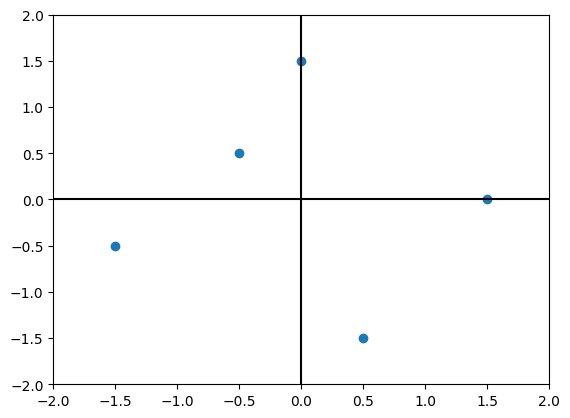

In [8]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.plot([-2, 2], [0, 0], c="black")
plt.plot([0, 0], [-2, 2], c="black")
plt.xlim(-2, 2)
plt.ylim(-2, 2);

**Назовем новые координаты (стоблцы матрицы X_scaled) $x_1$ и $x_2$. Задача: найти такую линейную комбинацию $z = \alpha x_1 + \beta x_2$, что дисперсия $z$ максимальна. При этом должно выполняться $\alpha^2 + \beta^2 = 1.$**
**Заметим что $$\Large D[z] = E[(z - E[z])^2]  = E[z^2] = \frac{1}{n} \sum_i^n z_i^2,$$ поскольку $E[z] = \alpha E[x_1] + \beta E[x_2] = 0$ (новые координаты центрированы).**

**Тогда задача формализуется так:**
$$\Large \begin{cases} \max_{\alpha, \beta} \sum_i^n (\alpha x_{1_i} + \beta x_{2_i})^2 \\  \alpha^2 + \beta^2 = 1\end{cases}$$

У нас $2z = [-3\alpha -\beta,\ -\alpha +\beta,\ \alpha -3\beta,\ 3\alpha,\ 3\beta]^T$ (Для задачи максимизации неважно, что мы умножили на 2, зато так удобней).
           

Распишем в нашем случае: $  \sum_i^n (\alpha x_{1_i} + \beta x_{2_i})^2 = (-3\alpha -\beta)^2 + ( -\alpha +\beta)^2 +( \alpha -3\beta)^2 +( 3\alpha)^2 +( 3\beta)^2 = 20\alpha^2 - 2\alpha\beta + 20\beta^2$ =  <font color='green'>\\ поскольку $\alpha^2 + \beta^2 = 1$ \\ </font>  = $20 - 2\alpha\beta$. Осталось только минимизировать $\alpha\beta$. Можно это делать методом Лагранжа, но в данном случае можно проще

$$\Large \begin{cases} \min_{\alpha, \beta} \alpha\beta \\  \alpha^2 + \beta^2 = 1\end{cases}$$

$\Large \alpha\beta = \beta^2(\frac{\alpha}{\beta})$ = <font color='green'>\\ замена t = $\frac{\alpha}{\beta}, \alpha^2 + \beta^2 = 1$ \\  </font> = $\Large \frac{t}{1+t^2}$. Ищем минимум функции одной переменной, находим, что $t^* = -1$.

Значит, $$\Large \begin{cases} \alpha^* = -\beta^*\\  (\alpha^*)^2 + (\beta^*)^2 = 1\end{cases} \Rightarrow \alpha^* =
\frac{1}{\sqrt{2}}, \beta^* = - \frac{1}{\sqrt{2}}$$

Итак, $$\Large z = \frac{1}{\sqrt{2}} x_1 - \frac{1}{\sqrt{2}}x_2$$ То есть ось $z$ повернута на 45 градусов относительно $x_1$ и $x_2$ и "направлена на юго-восток".

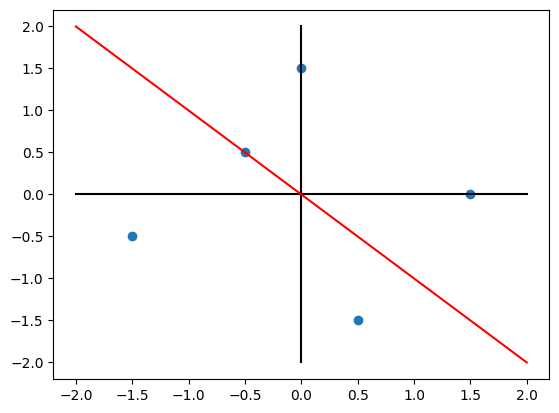

In [9]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.plot([-2, 2], [0, 0], c="black")
plt.plot([0, 0], [-2, 2], c="black")
plt.plot([-2, 2], [2, -2], c="red");

**Новые координаты точек по оси z:**

In [10]:
X_scaled.dot(np.array([1.0 / np.sqrt(2), -1.0 / np.sqrt(2)]))

array([-0.70710678, -0.70710678,  1.41421356,  1.06066017, -1.06066017])

## Сингулярное разложение матрицы X

Представление будет таким: $X = U\Sigma V^T$.

- Матрица $U$ составлена из собственных векторов матрицы $XX^T$. Это левые сингулярные векторы матрицы $X$;
- Матрица $V$ составлена из собственных векторов матрицы $X^TX$. Это правые сингулярные векторы матрицы $X$;
- Матрица $\Sigma$ - диагональная (вне главной диагонали нули), и на диагонали стоят корни  из собственных значений матрицы $X^TX$ (или $XX^T$). Это сингулярные числа матрицы $X$.

$XX^T$ выглядит так:

In [11]:
X_scaled.dot(X_scaled.T)

array([[ 2.5 ,  0.5 ,  0.  , -2.25, -0.75],
       [ 0.5 ,  0.5 , -1.  , -0.75,  0.75],
       [ 0.  , -1.  ,  2.5 ,  0.75, -2.25],
       [-2.25, -0.75,  0.75,  2.25,  0.  ],
       [-0.75,  0.75, -2.25,  0.  ,  2.25]])

$X^TX$ выглядит так:

In [12]:
X_scaled.T.dot(X_scaled)

array([[ 5.  , -0.25],
       [-0.25,  5.  ]])

Собственные вектора $XX^T$ (левые сингулярные):

In [13]:
np.linalg.eig(X_scaled.dot(X_scaled.T))[1]

array([[-6.95492109e-01,  6.48885685e-01, -3.08606700e-01,
         1.02360811e-01,  6.93632209e-01],
       [ 1.36936270e-01,  1.52708272e-16, -3.08606700e-01,
        -6.71504918e-02, -2.04411294e-01],
       [ 2.88286884e-02,  3.24442842e-01,  6.17213400e-01,
         6.65747467e-01, -3.46969992e-02],
       [-6.59456248e-01, -4.86664263e-01,  4.62910050e-01,
        -1.41938509e-01,  6.37060778e-01],
       [-2.48647438e-01, -4.86664263e-01, -4.62910050e-01,
         7.22251235e-01,  2.64650835e-01]])

Собственные вектора $X^TX$ (правые сингулярные). Эти вектора задают представление главных компонент через исходные координаты (то есть они задают поворот).

In [14]:
np.linalg.eig(X_scaled.T.dot(X_scaled))[1]

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

Видно, что главные компоненты: $$\Large z_1 = \frac{1}{\sqrt{2}} x_1 - \frac{1}{\sqrt{2}}x_2,\ z_2 = \frac{1}{\sqrt{2}} x_1 + \frac{1}{\sqrt{2}}x_2$$

Собственные значения $X^TX$ (сингулярные числа):

In [15]:
np.linalg.eig(X_scaled.T.dot(X_scaled))[0]

array([5.25, 4.75])

In [16]:
np.linalg.eig(X_scaled.dot(X_scaled.T))[0]

array([0.00000000e+00, 4.75000000e+00, 5.25000000e+00, 2.93191668e-16,
       6.41576033e-18])

In [17]:
from scipy.linalg import svd

U, Sigma, VT = svd(X_scaled)

Действительно. На диагонали матрицы $\Sigma$ стоят корни из собственных значений $X^TX$ ($\sqrt{5.25} \approx 2.29, \sqrt{4.75} \approx 2.18$):

In [18]:
Sigma

array([2.29128785, 2.17944947])

Вектора матрицы $VT$ (правые сингулярные векторы для исходной матрицы) задают поворот. То есть первая главная компонента "смотрит на юго-восток", вторая - на юго-запад.

In [19]:
VT

array([[ 0.70710678, -0.70710678],
       [-0.70710678, -0.70710678]])

Представление данных в проекции на 2 главные компоненты $Z = XV$:

In [20]:
X_scaled.dot(VT.T)

array([[-7.07106781e-01,  1.41421356e+00],
       [-7.07106781e-01, -2.77555756e-16],
       [ 1.41421356e+00,  7.07106781e-01],
       [ 1.06066017e+00, -1.06066017e+00],
       [-1.06066017e+00, -1.06066017e+00]])

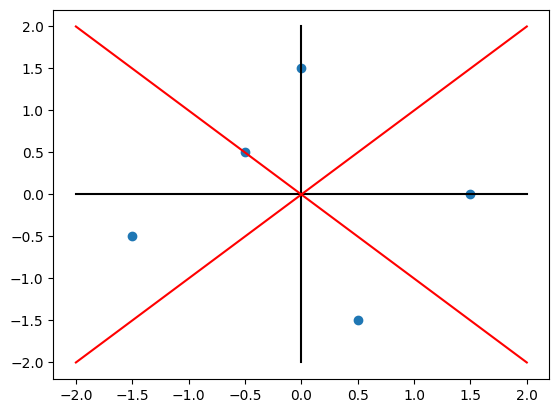

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.plot([-2, 2], [0, 0], c="black")
plt.plot([0, 0], [-2, 2], c="black")
plt.plot([-2, 2], [2, -2], c="red")
plt.plot([-2, 2], [-2, 2], c="red");

Здесь SVD SciPy "направил" ось z1 вправо и вниз, а ось z2 - влево и вниз. Можно проверить, что представление получилось правильным.